In [395]:
import geopandas as gpd
import calendar
months = list(map(lambda x:x.lower(),calendar.month_name))[1:]
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
from word2number import w2n
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import os, re
project_folder =os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))


In [2]:
# That's not part of the procedure
pd.read_csv(f'{project_folder}/data/process/new_data.csv').reset_index().iloc[0].to_csv('output_2/fileds_to_work_on.csv')

In [377]:
# show the questions
pd.read_csv(f'{project_folder}/data/process/new_data.csv', skiprows=[2]).reset_index().iloc[0]

index                                                          0
StartDate                                             Start Date
EndDate                                                 End Date
Status                                             Response Type
IPAddress                                             IP Address
                                     ...                        
Q38            What is the highest level of education you hav...
Q39            What do you consider your main ethnic origin o...
Q39_10_TEXT    What do you consider your main ethnic origin o...
Q40            Where did you hear about this survey? - Select...
Q40_3_TEXT     Where did you hear about this survey? - Other ...
Name: 0, Length: 75, dtype: object

#### Data Preparation

In [2]:
data_general = pd.read_csv(f'{project_folder}/data/process/fianl_geo_coding.csv', skiprows=[1, 2]).reset_index()
# Read dictionary of relevant questions
questions_to_examine=pd.read_csv(f'output_2/fileds_to_work_on_updated.csv')
rel_questions_dic = dict(zip(questions_to_examine['Number'], questions_to_examine['Abbreviation ']))
field_to_work_on = 'index'

In [3]:
special_questions = ['Q26', 'Q27', 'Q32', 'Q33']


#### Q26

In [420]:
data_general['Q26'] = data_general['Q26'].apply(lambda x: str(x).rstrip().lstrip())
gb_data_0= data_general.groupby('Q26').count()[field_to_work_on].sort_values(ascending=False)
# Values to delete
null_values =['nan','N/a','Na','na','None','-','Months']
gb_data = gb_data_0[~gb_data_0.index.isin(null_values)]

In [444]:
from qu_26_27 import InterpretTime
time_q26 = InterpretTime(gb_data)
for res in time_q26.new_gb_data.iterrows():
    time_q26.main_part(res)
time_q26.new_gb_data

C:\Users\Achituv\My_Drive\current_projects\Biketheft\python\notebooks\paper_2_notebook\qu_26_27.py:29: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.res = Series()
C:\Users\Achituv\My_Drive\current_projects\Biketheft\python\notebooks\paper_2_notebook\qu_26_27.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.new_gb_data[self.ref_key][self.period] = time


,count,num_of_days
Q26,,
30,132,30
60,103,60
90,55,90
14,43,14
7,35,7
...,...,...
4 days,1,4
4 months - no supply,1,120
4 weeks,1,28


<AxesSubplot: xlabel='num_of_days'>

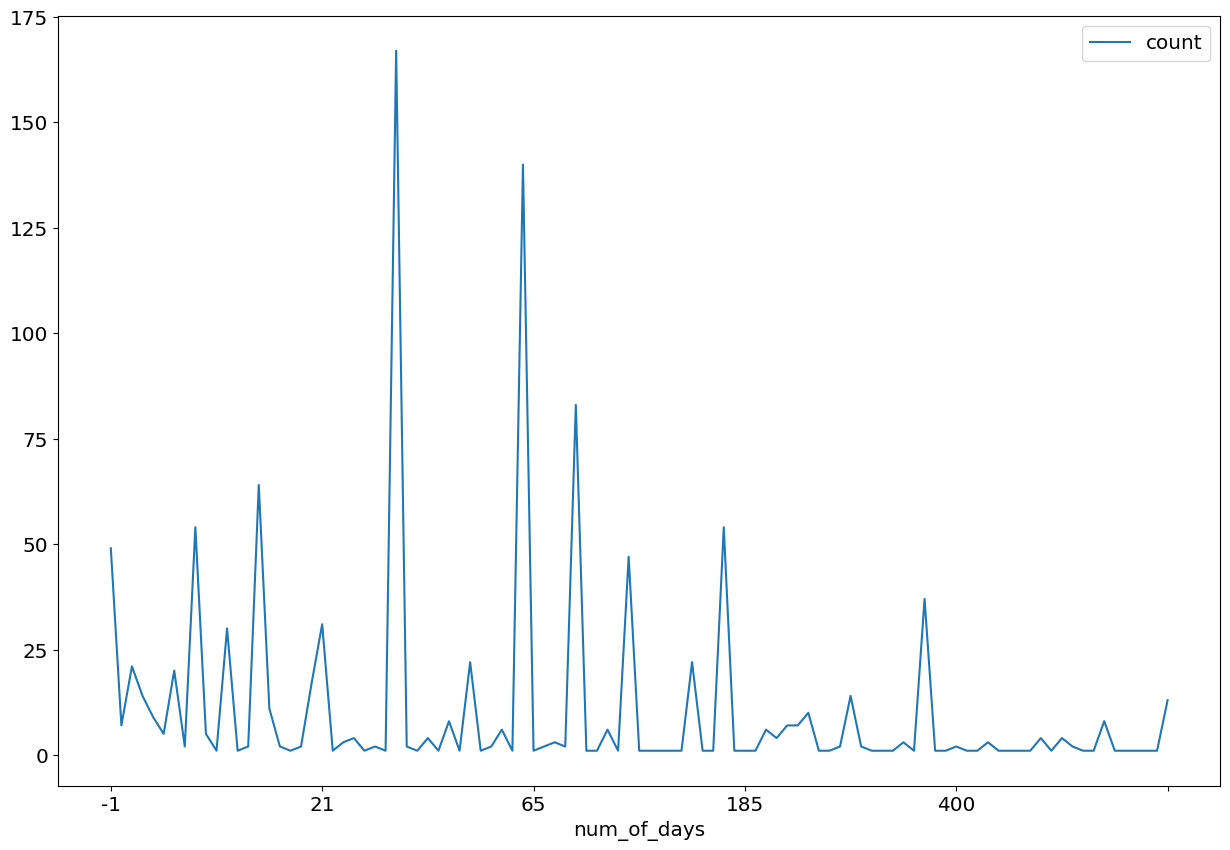

In [462]:
time_q26.new_gb_data.groupby('num_of_days').sum().plot()


#### Q27

C:\Users\Achituv\My_Drive\current_projects\Biketheft\python\notebooks\paper_2_notebook\qu_26_27.py:29: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.res = Series()
C:\Users\Achituv\My_Drive\current_projects\Biketheft\python\notebooks\paper_2_notebook\qu_26_27.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.new_gb_data[self.ref_key][self.period] = time


<AxesSubplot: xlabel='num_of_days'>

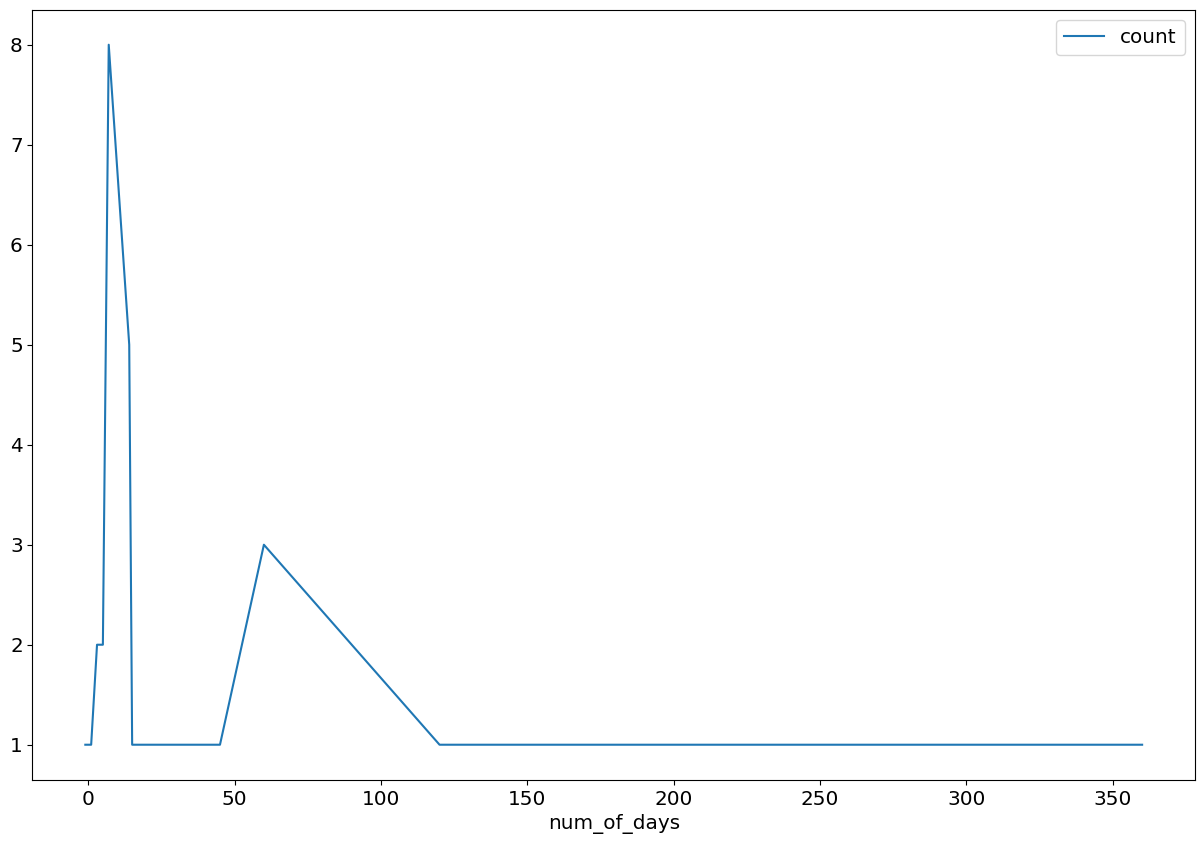

In [463]:
gb_data_first = data_general.groupby('Q27').count()[field_to_work_on].sort_values(ascending=False)
gb_data_27 = gb_data_first.dropna()
time_q27 = InterpretTime(gb_data_27)
for res in time_q27.new_gb_data.iterrows():
    time_q27.main_part(res)
time_q27.new_gb_data.groupby('num_of_days').sum().plot()

In [464]:
time_q27.new_gb_data.groupby('num_of_days').sum()

,count
num_of_days,
-1,1
0,1
1,1
3,2
5,2
7,8
14,5
15,1
19,1


Q32


<AxesSubplot: title={'center': 'Reason less'}, xlabel='question'>

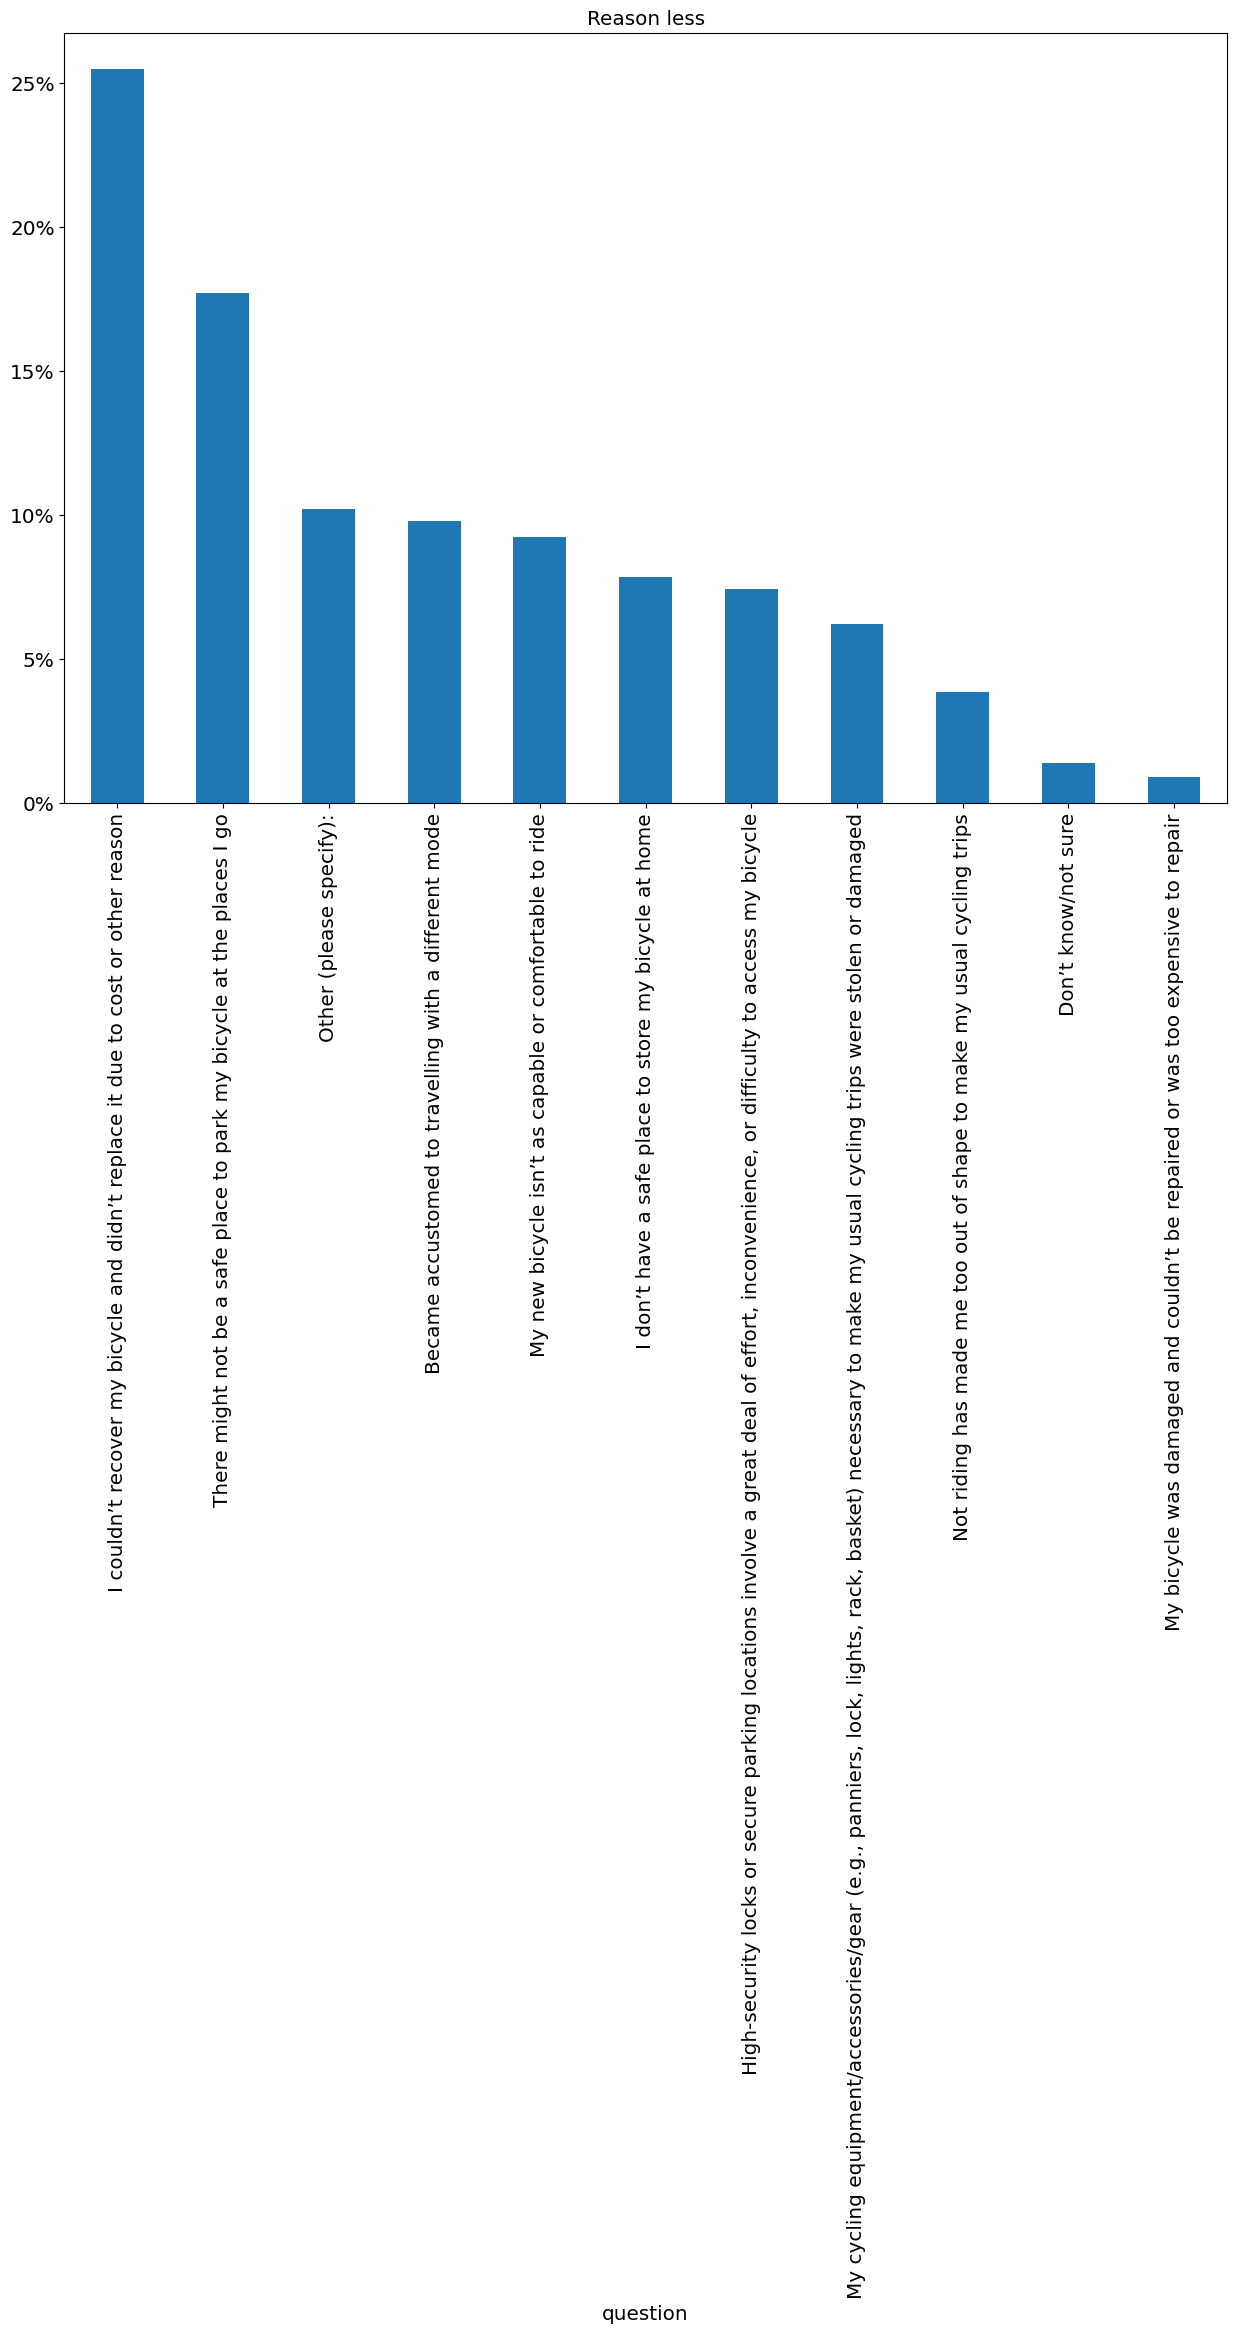

Q33


<AxesSubplot: title={'center': 'Reason more'}, xlabel='question'>

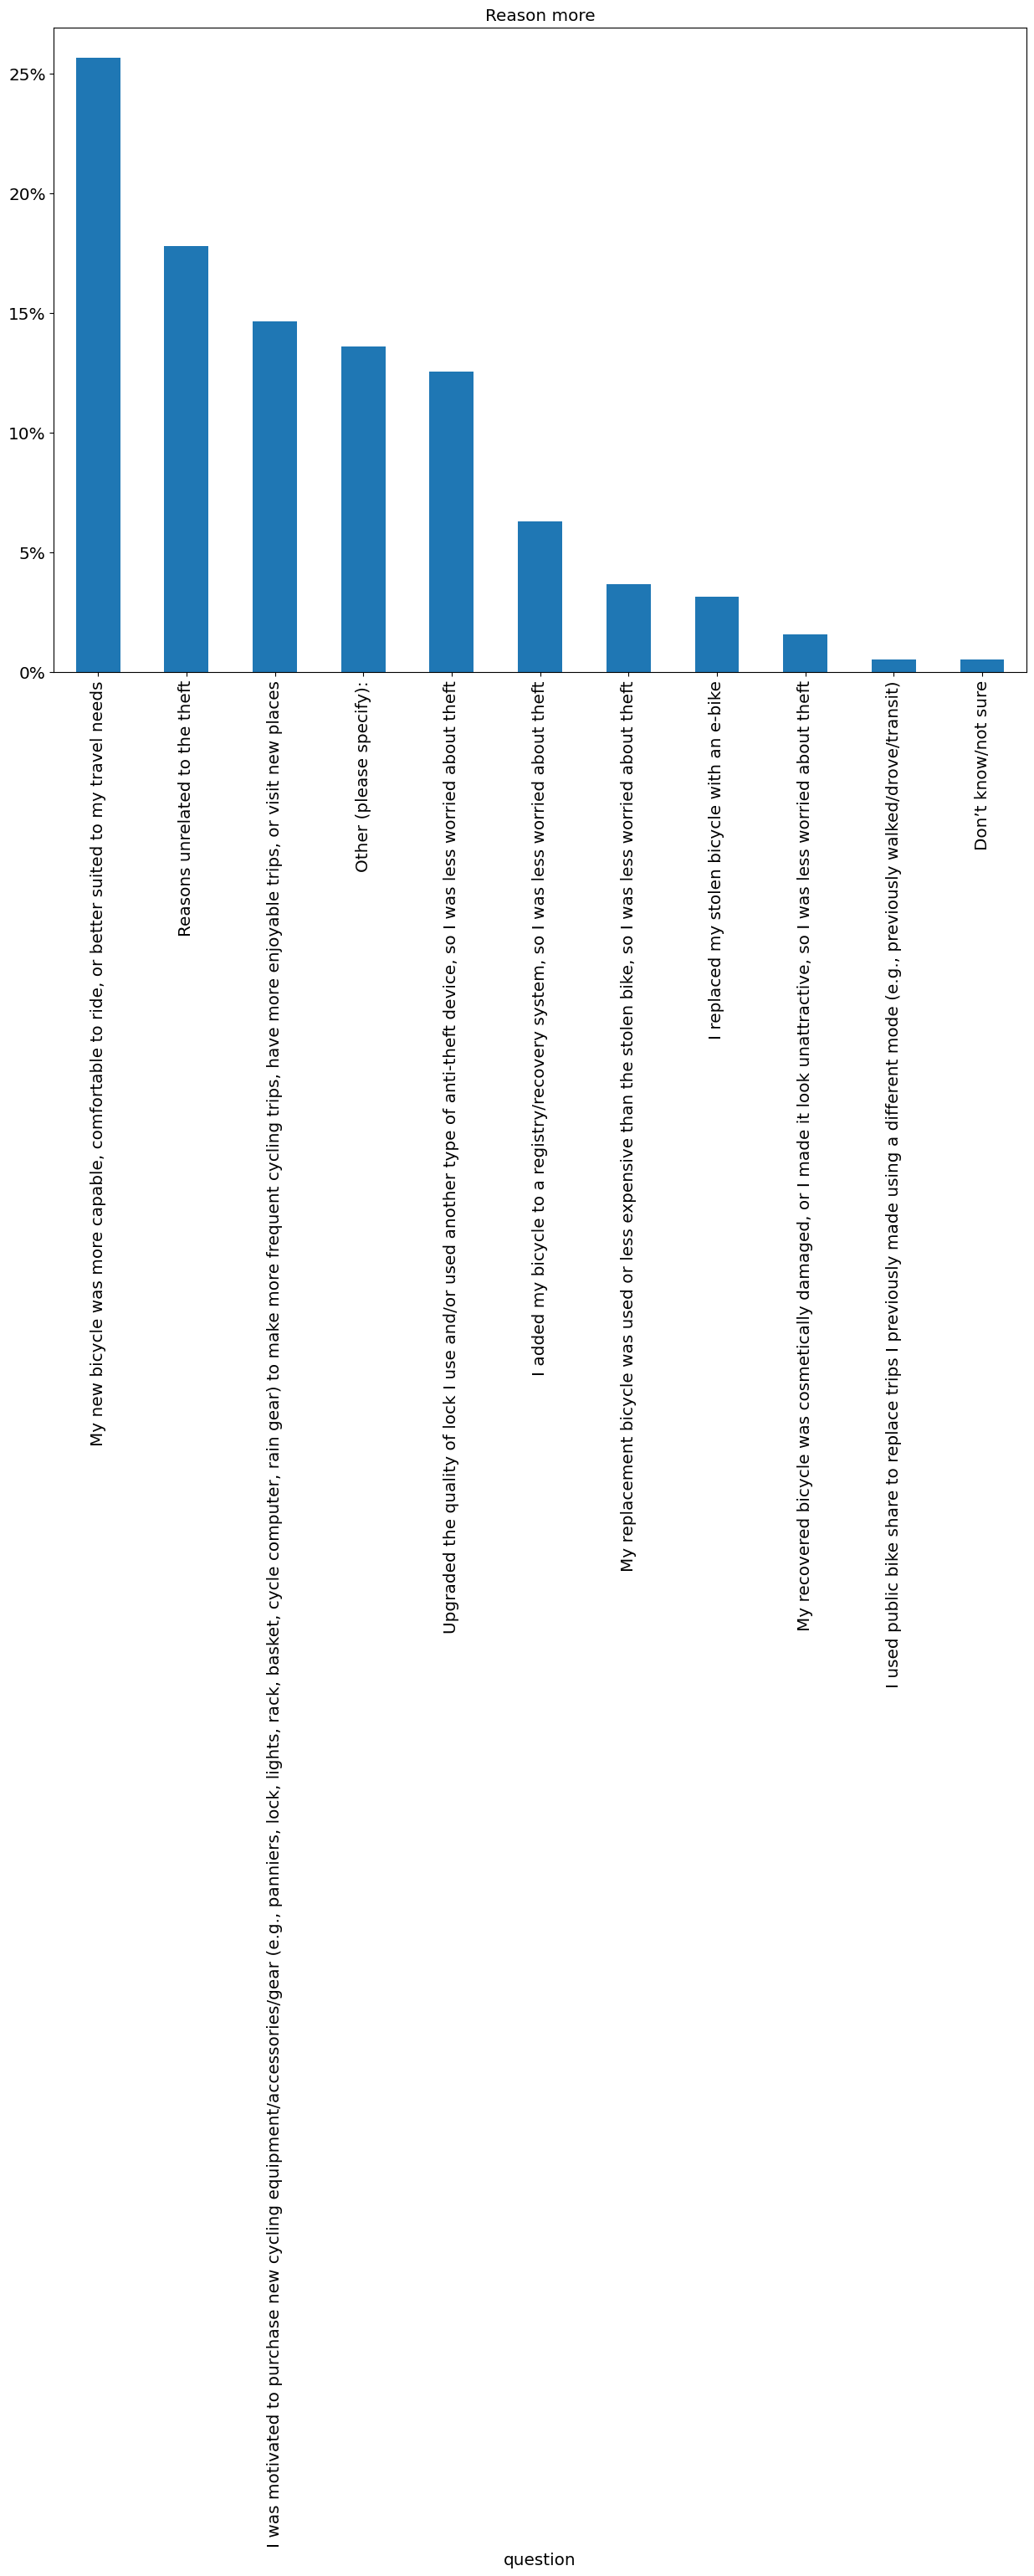

In [68]:
# code for Q32 and Q33 which is multiple choices questions
for question_num in special_questions[-2:]:
    print(question_num)
    # Read choice options
    choice_df = pd.read_csv(f'output_2/{question_num}.csv',encoding='cp1252').set_index('question')
    # grpoupby data by the responses to the question_num
    gb_data= data_general.groupby(question_num).count()[field_to_work_on].sort_values(ascending=False).reset_index()
    # Go over each separate response
    for  item in choice_df.iterrows():
        question = item[0]
        # search the current response in the multiple choices responses
        for row_0 in gb_data.iterrows():
            row = row_0[1]
            if question in row[question_num]:
                # if the response was found add the number of respondants that use that respomse as part on 1 or combination of choices
                choice_df.loc[question]+=row[field_to_work_on]
    # calculate percentage
    sumy = choice_df.sum()
    choice_df['per'] = choice_df/sumy
    choice_df.sort_values(by='per',ascending=False,inplace=True)
    # Plot results
    choice_df['per'].plot(kind='bar',title=rel_questions_dic[question_num])
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))
    plt.show()

In [26]:

gb_data

,Q32,index
0,I couldn’t recover my bicycle and didn’t repla...,187
1,Other (please specify):,66
2,There might not be a safe place to park my bic...,65
3,My new bicycle isn’t as capable or comfortable...,47
4,Became accustomed to travelling with a differe...,32
...,...,...
106,I don’t have a safe place to store my bicycle ...,1
107,There might not be a safe place to park my bic...,1
108,Became accustomed to travelling with a differe...,1
109,Became accustomed to travelling with a differe...,1


In [32]:

question.name

'There might not be a safe place to park my bicycle at the places I go'

In [35]:
choice_df

,count
question,
There might not be a safe place to park my bicycle at the places I go,0
Became accustomed to travelling with a different mode,0
My new bicycle isn’t as capable or comfortable to ride,0
"High-security locks or secure parking locations involve a great deal of effort, inconvenience, or difficulty to access my bicycle",0
I couldn’t recover my bicycle and didn’t replace it due to cost or other reason,0
I don’t have a safe place to store my bicycle at home,0
My bicycle was damaged and couldn’t be repaired or was too expensive to repair,0
"My cycling equipment/accessories/gear (e.g., panniers, lock, lights, rack, basket) necessary to make my usual cycling trips were stolen or damaged",0
Not riding has made me too out of shape to make my usual cycling trips,0


In [53]:
for  item in choice_df.iterrows():
    question = item[0]
    for row_0 in gb_data.iterrows():
        row = row_0[1]
        if question in row[question_num]:
            choice_df.loc[question]+=row[field_to_work_on]
choice_df

,count
question,
There might not be a safe place to park my bicycle at the places I go,217
Became accustomed to travelling with a different mode,120
My new bicycle isn’t as capable or comfortable to ride,113
"High-security locks or secure parking locations involve a great deal of effort, inconvenience, or difficulty to access my bicycle",91
I couldn’t recover my bicycle and didn’t replace it due to cost or other reason,312
I don’t have a safe place to store my bicycle at home,96
My bicycle was damaged and couldn’t be repaired or was too expensive to repair,11
"My cycling equipment/accessories/gear (e.g., panniers, lock, lights, rack, basket) necessary to make my usual cycling trips were stolen or damaged",76
Not riding has made me too out of shape to make my usual cycling trips,47


In [59]:

sumy = choice_df.sum()
choice_df['per'] = choice_df/sumy
choice_df['per'].plot(kind='bar',title=question[1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))
plt.show()

ValueError: Columns must be same length as key

In [ ]:
gb_data['per'] = gb_data/sumy
gb_data['per'].plot(kind='bar',title=question[1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))
plt.show()

Q25
​Yes, and I replaced it with exactly what was stolen or something more expensive     840
No                                                                                   564
Yes, but the replacement was something cheaper                                       427
Name: index, dtype: int64


<AxesSubplot: title={'center': 'Is replaced'}, xlabel='Q25'>

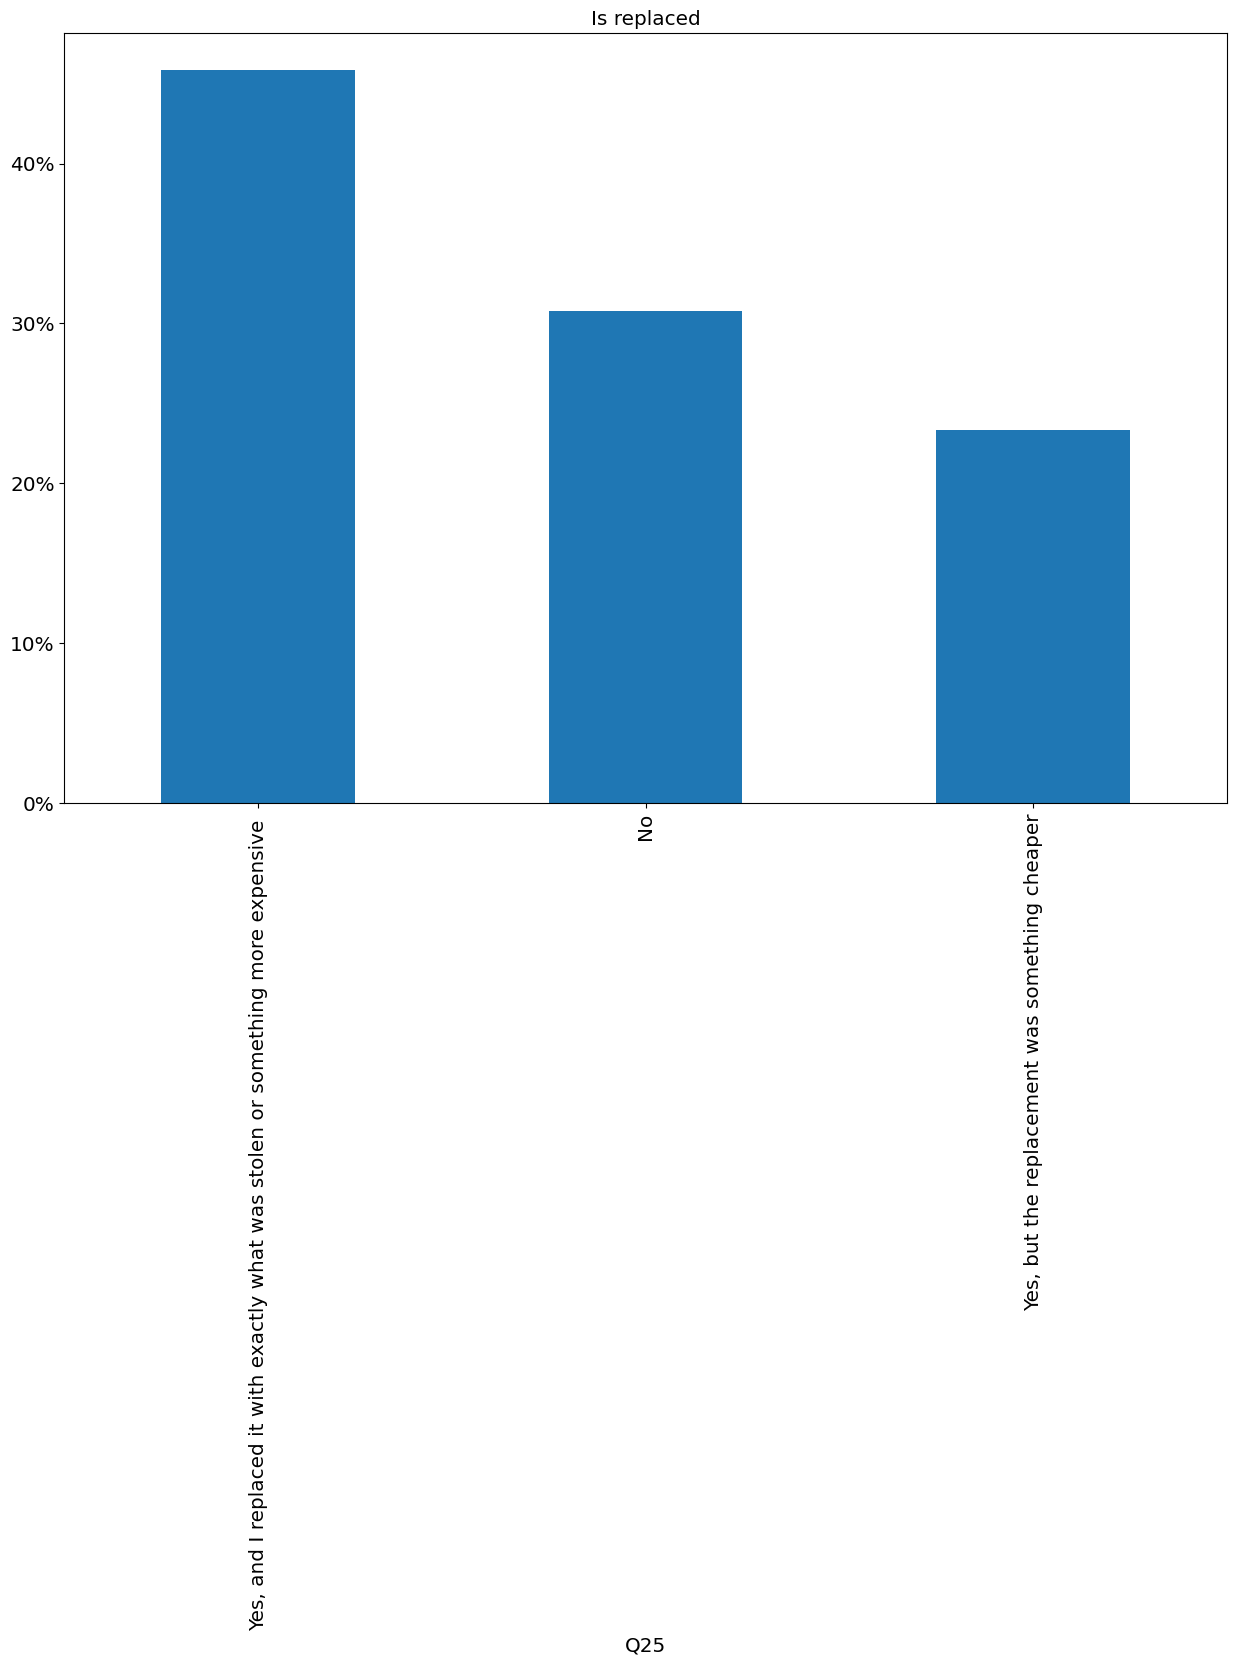

Q28_1
1-3 days a week           597
4 or more days a week     524
1-3 days a month          309
Never                     157
Less than once a month    144
Don't know/not sure        17
Name: index, dtype: int64


<AxesSubplot: title={'center': 'Fall habit'}, xlabel='Q28_1'>

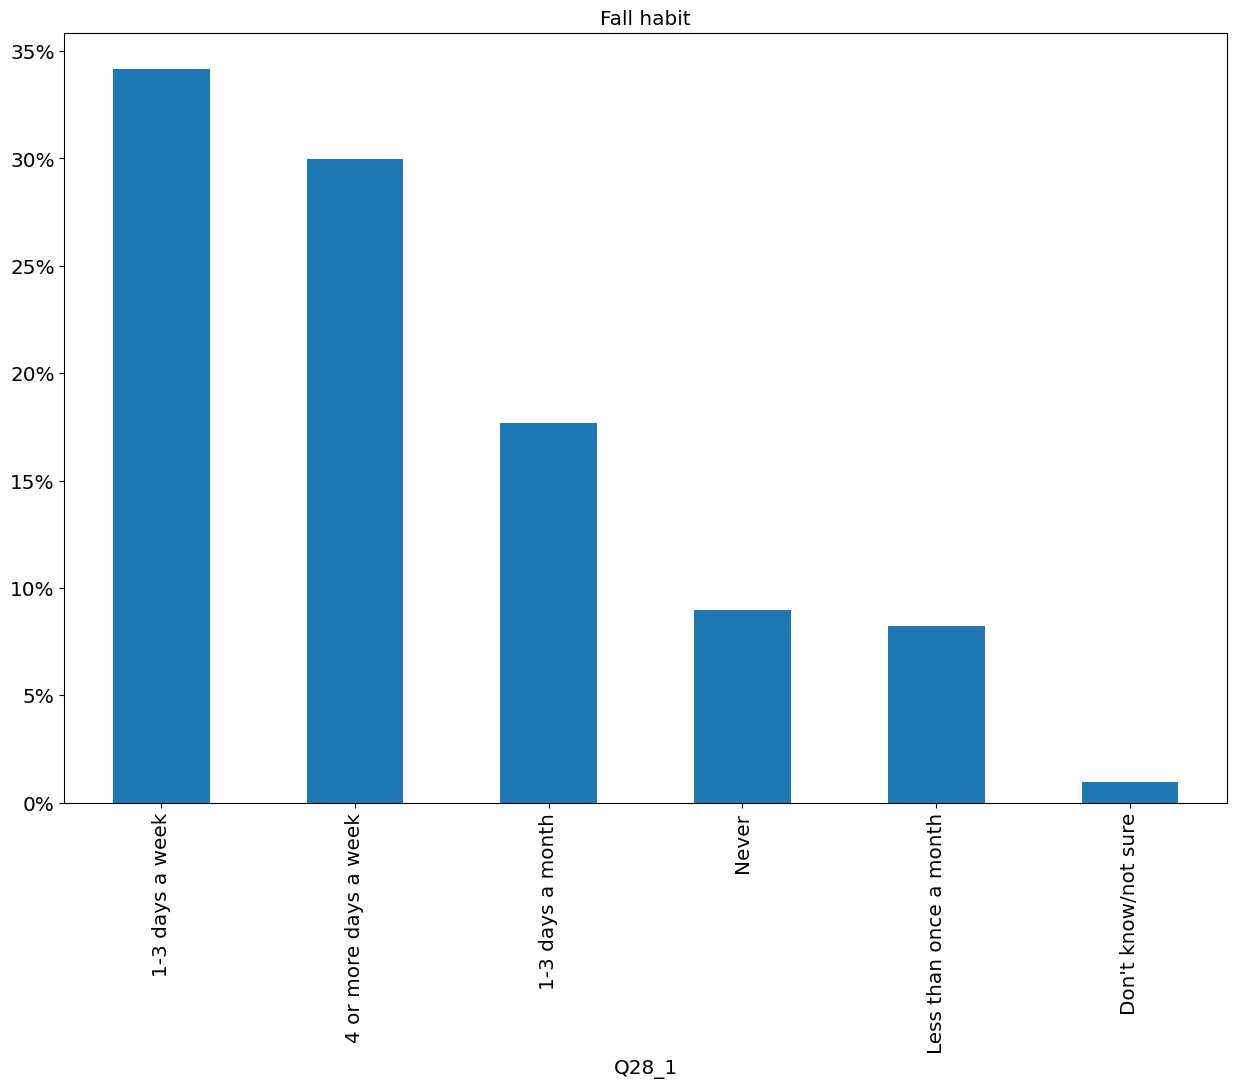

Q28_2
Never                     439
1-3 days a week           378
4 or more days a week     361
1-3 days a month          280
Less than once a month    242
Don't know/not sure        17
Name: index, dtype: int64


<AxesSubplot: title={'center': 'Winter habit'}, xlabel='Q28_2'>

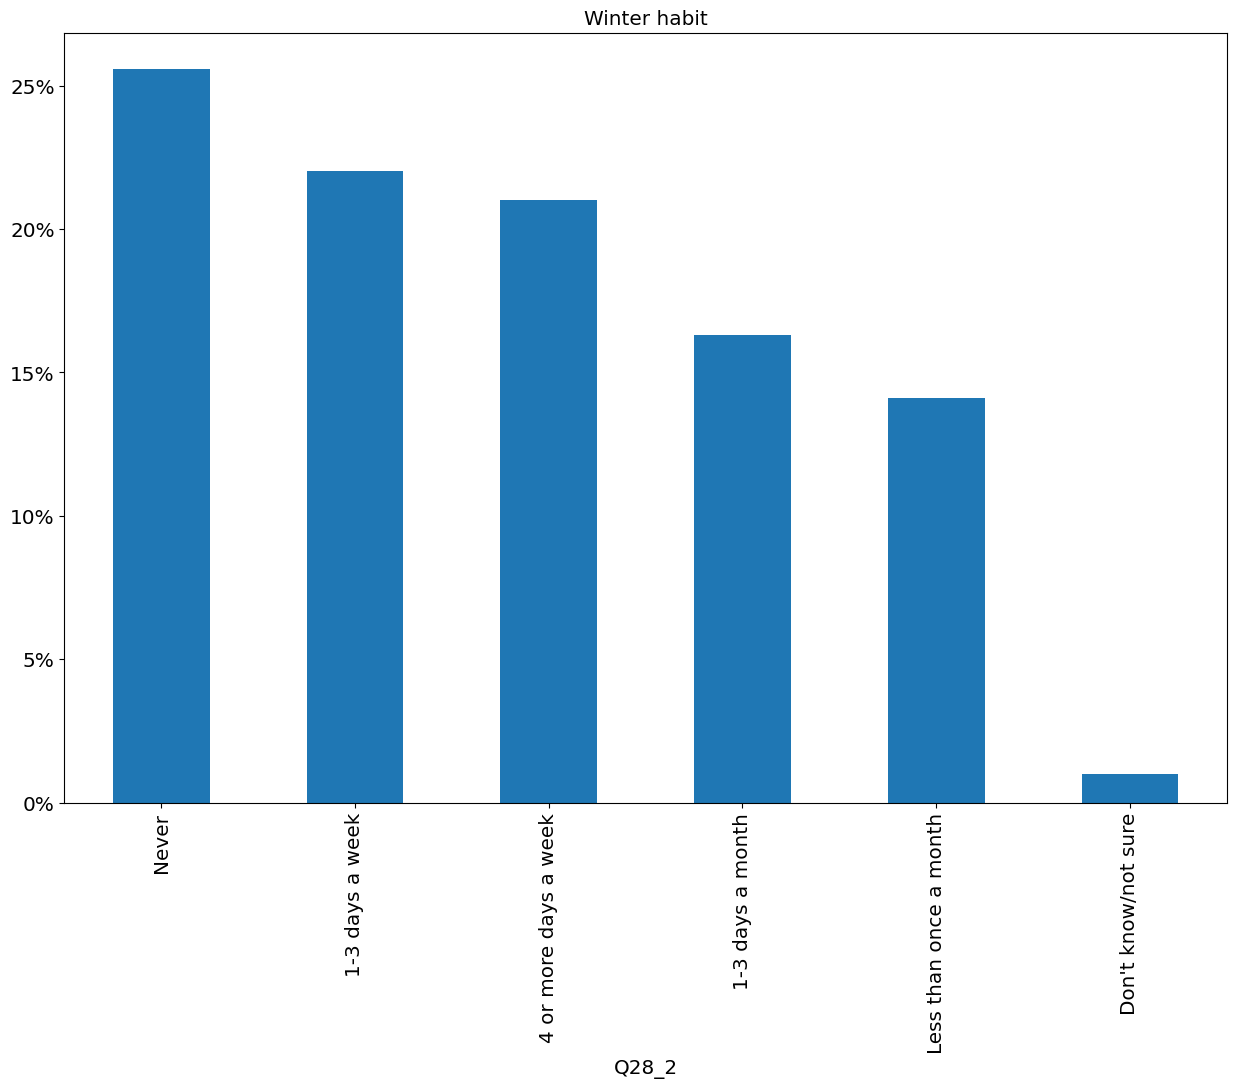

Q28_3
1-3 days a week           591
4 or more days a week     554
1-3 days a month          318
Never                     151
Less than once a month    102
Don't know/not sure        14
Name: index, dtype: int64


<AxesSubplot: title={'center': 'Spring habit'}, xlabel='Q28_3'>

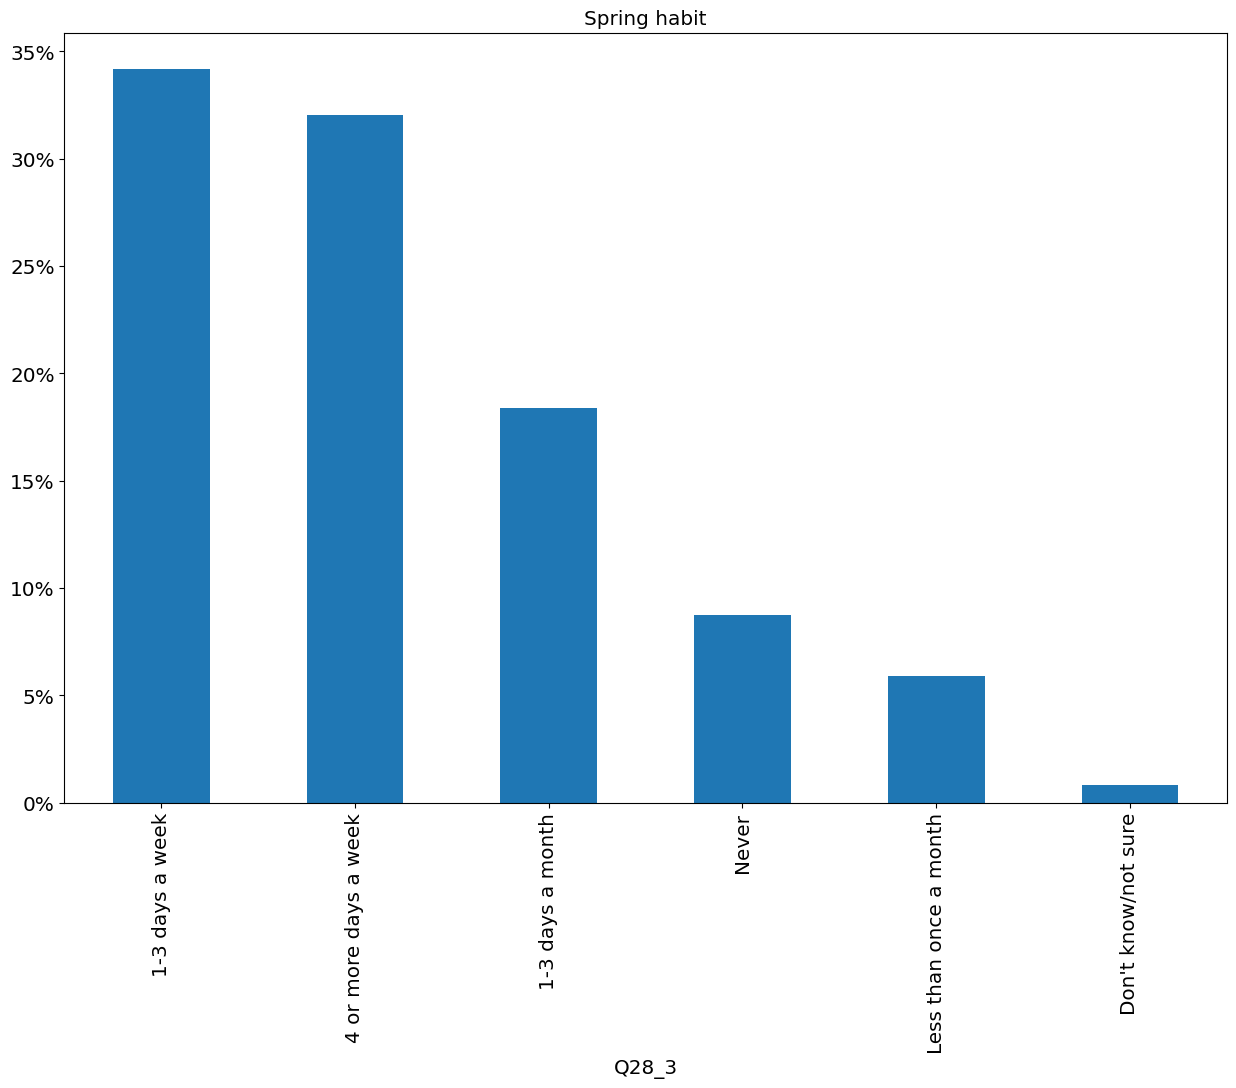

Q28_4
4 or more days a week     713
1-3 days a week           594
1-3 days a month          193
Never                     130
Less than once a month     78
Don't know/not sure        19
Name: index, dtype: int64


<AxesSubplot: title={'center': 'Summer habit'}, xlabel='Q28_4'>

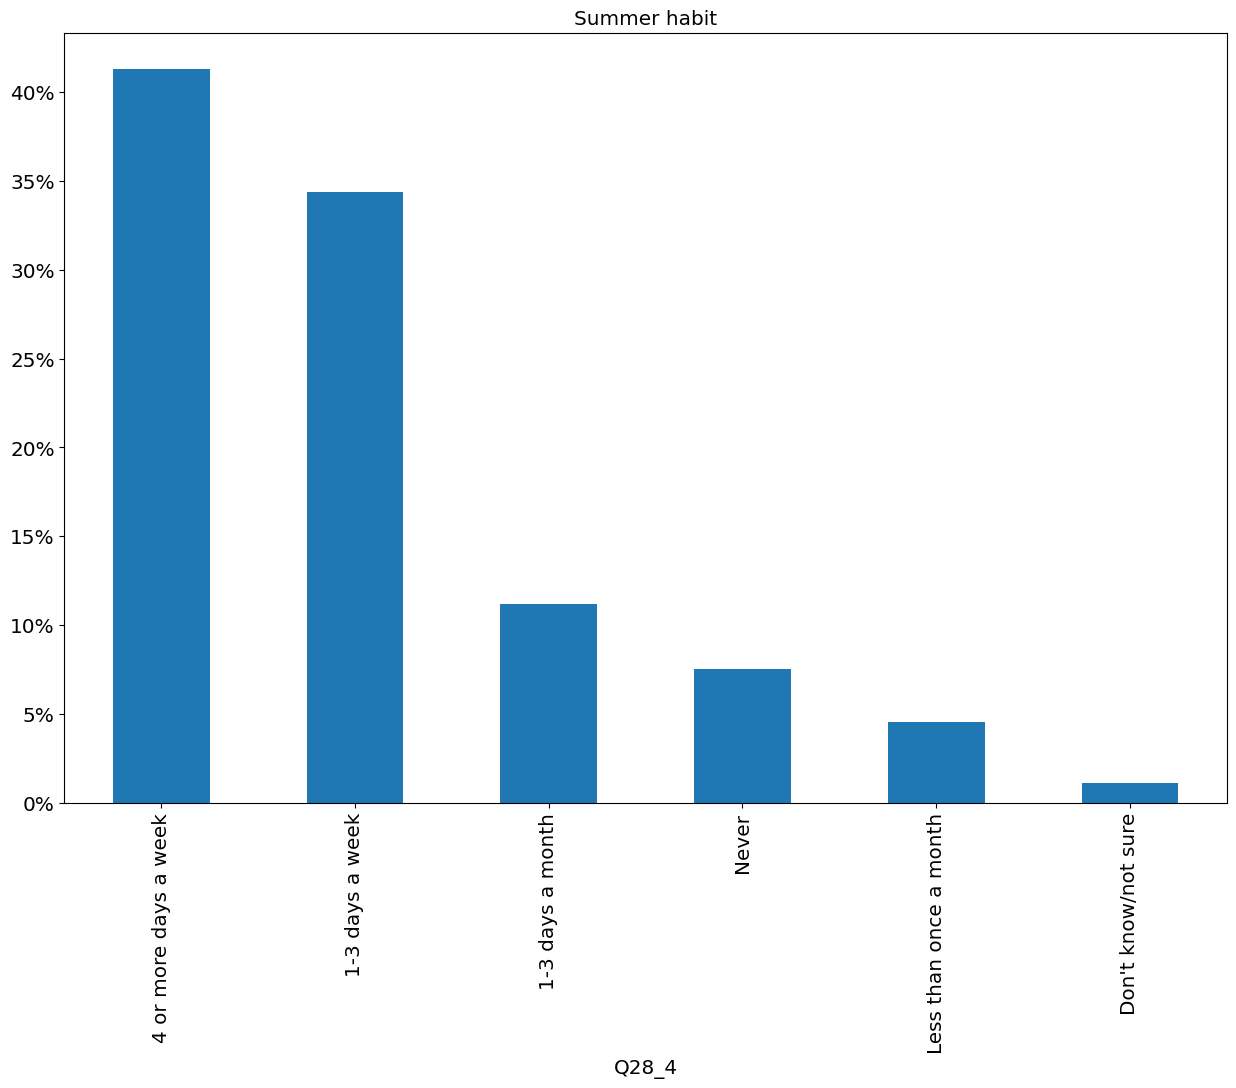

Q29
Recreation or exercise (e.g., cycling in your neighbourhood, to a park, greenway, or trail, with no destination)                   728
Transportation (e.g., commuting to school or work, shopping, errands, social engagements, connecting to transit, A to B trips)     550
Equal mix of recreation, exercise, and transportation trips                                                                        457
Don’t know/not sure                                                                                                                 10
Name: index, dtype: int64


<AxesSubplot: title={'center': 'Purpose trip'}, xlabel='Q29'>

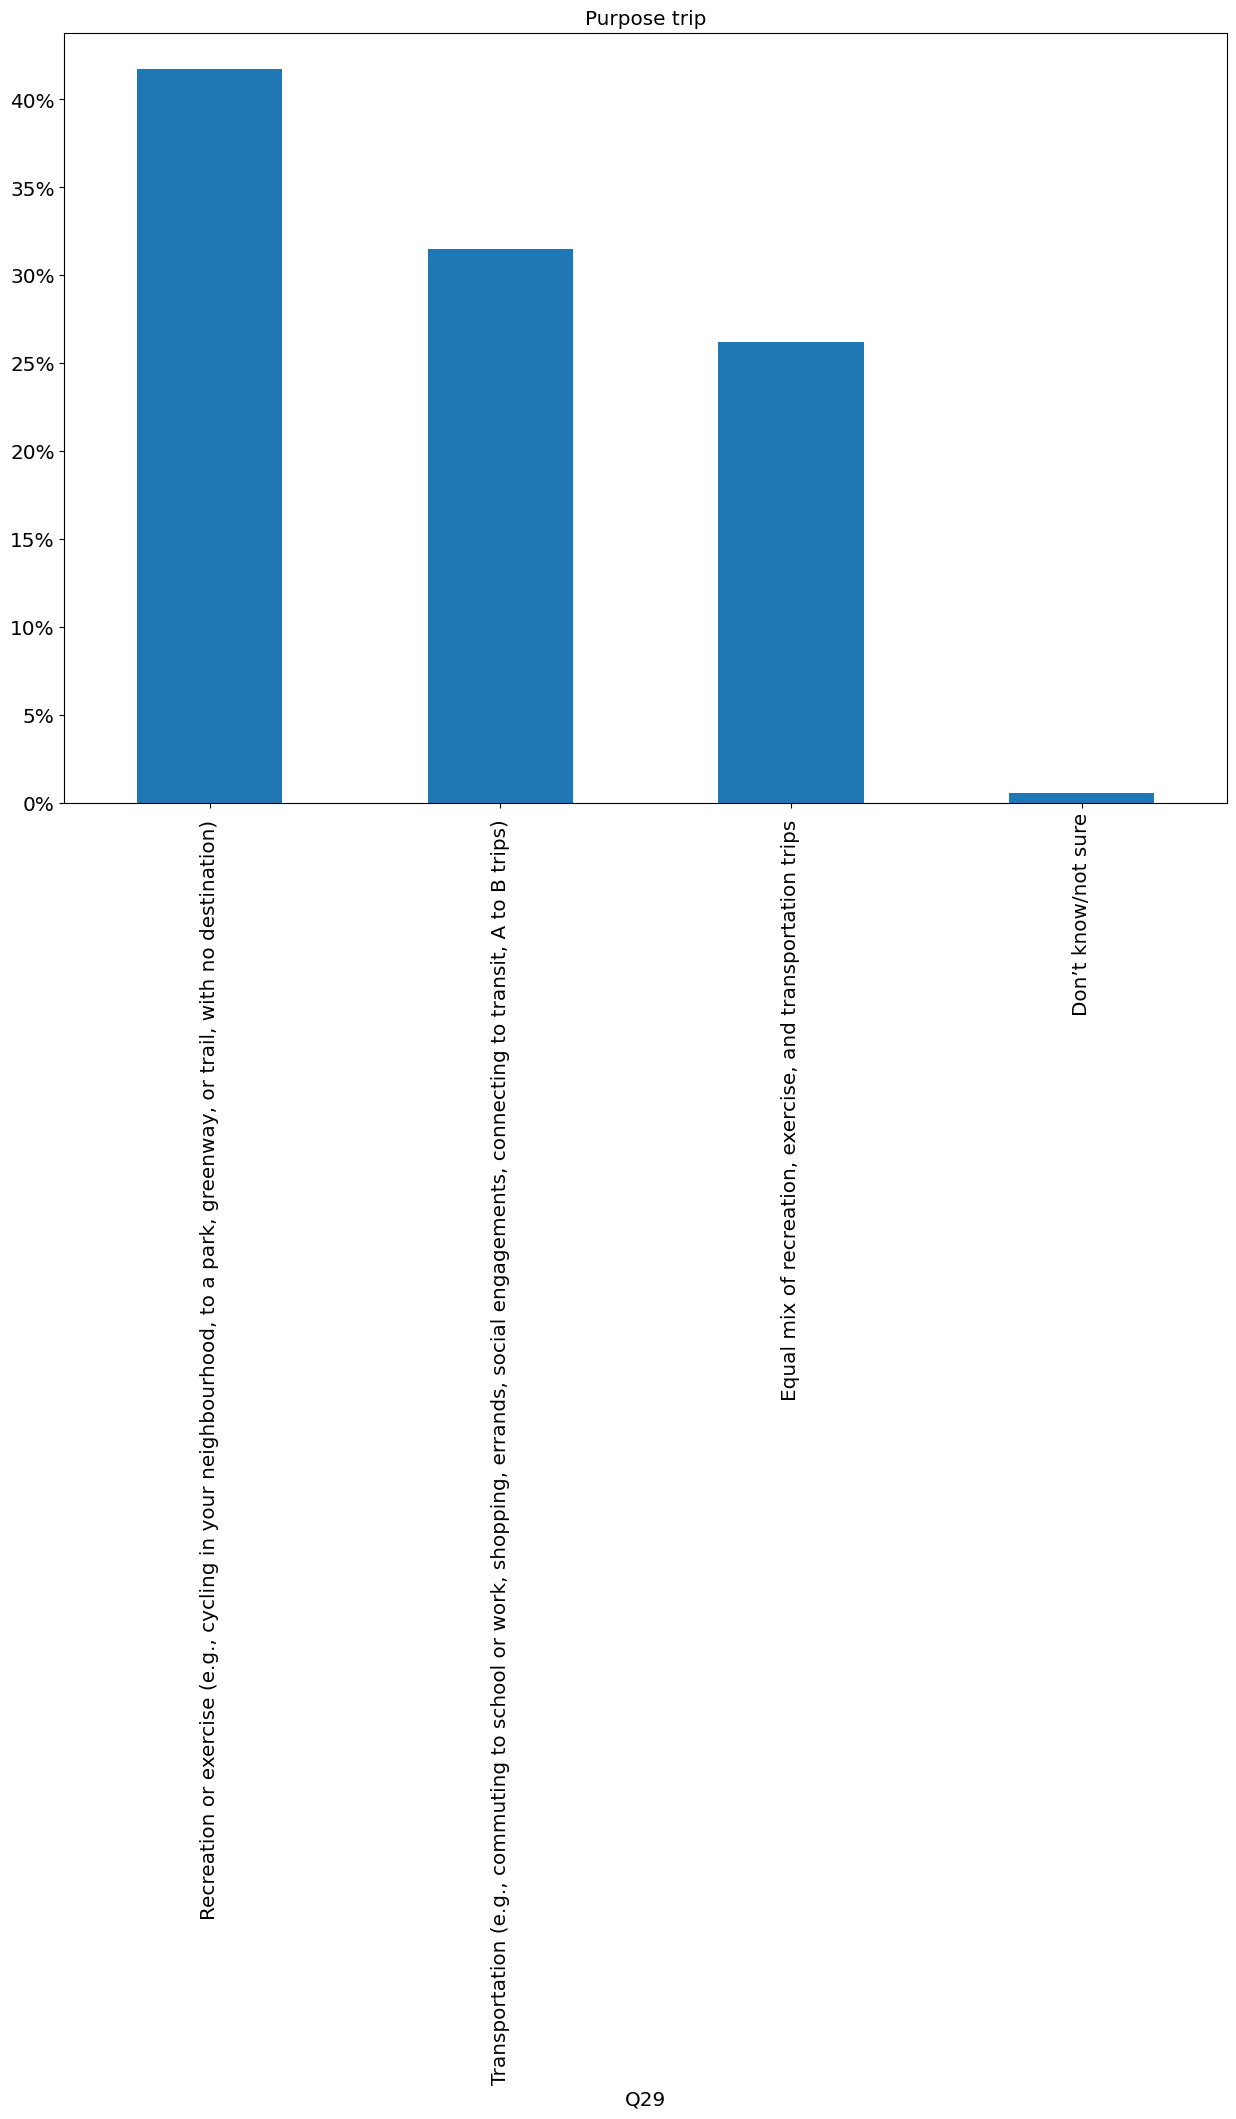

Q30
Car, as a driver (e.g., personal vehicle, carshare vehicle)                                      617
Cycle, personal bicycle (e.g., own a second bicycle or loaned a friend/family member’s bike)     293
Walk                                                                                             284
Didn’t make those trips                                                                          222
Transit (e.g., bus/rail)                                                                         166
Car, as a passenger (e.g., given rides by friends/family members)                                 58
Don’t know/not sure                                                                               29
Cycle, public bike share                                                                          27
Motorcycle or scooter                                                                             16
Taxi / Ride-hailing service (e.g., Uber, Lyft)                                         

<AxesSubplot: title={'center': 'Mode switch'}, xlabel='Q30'>

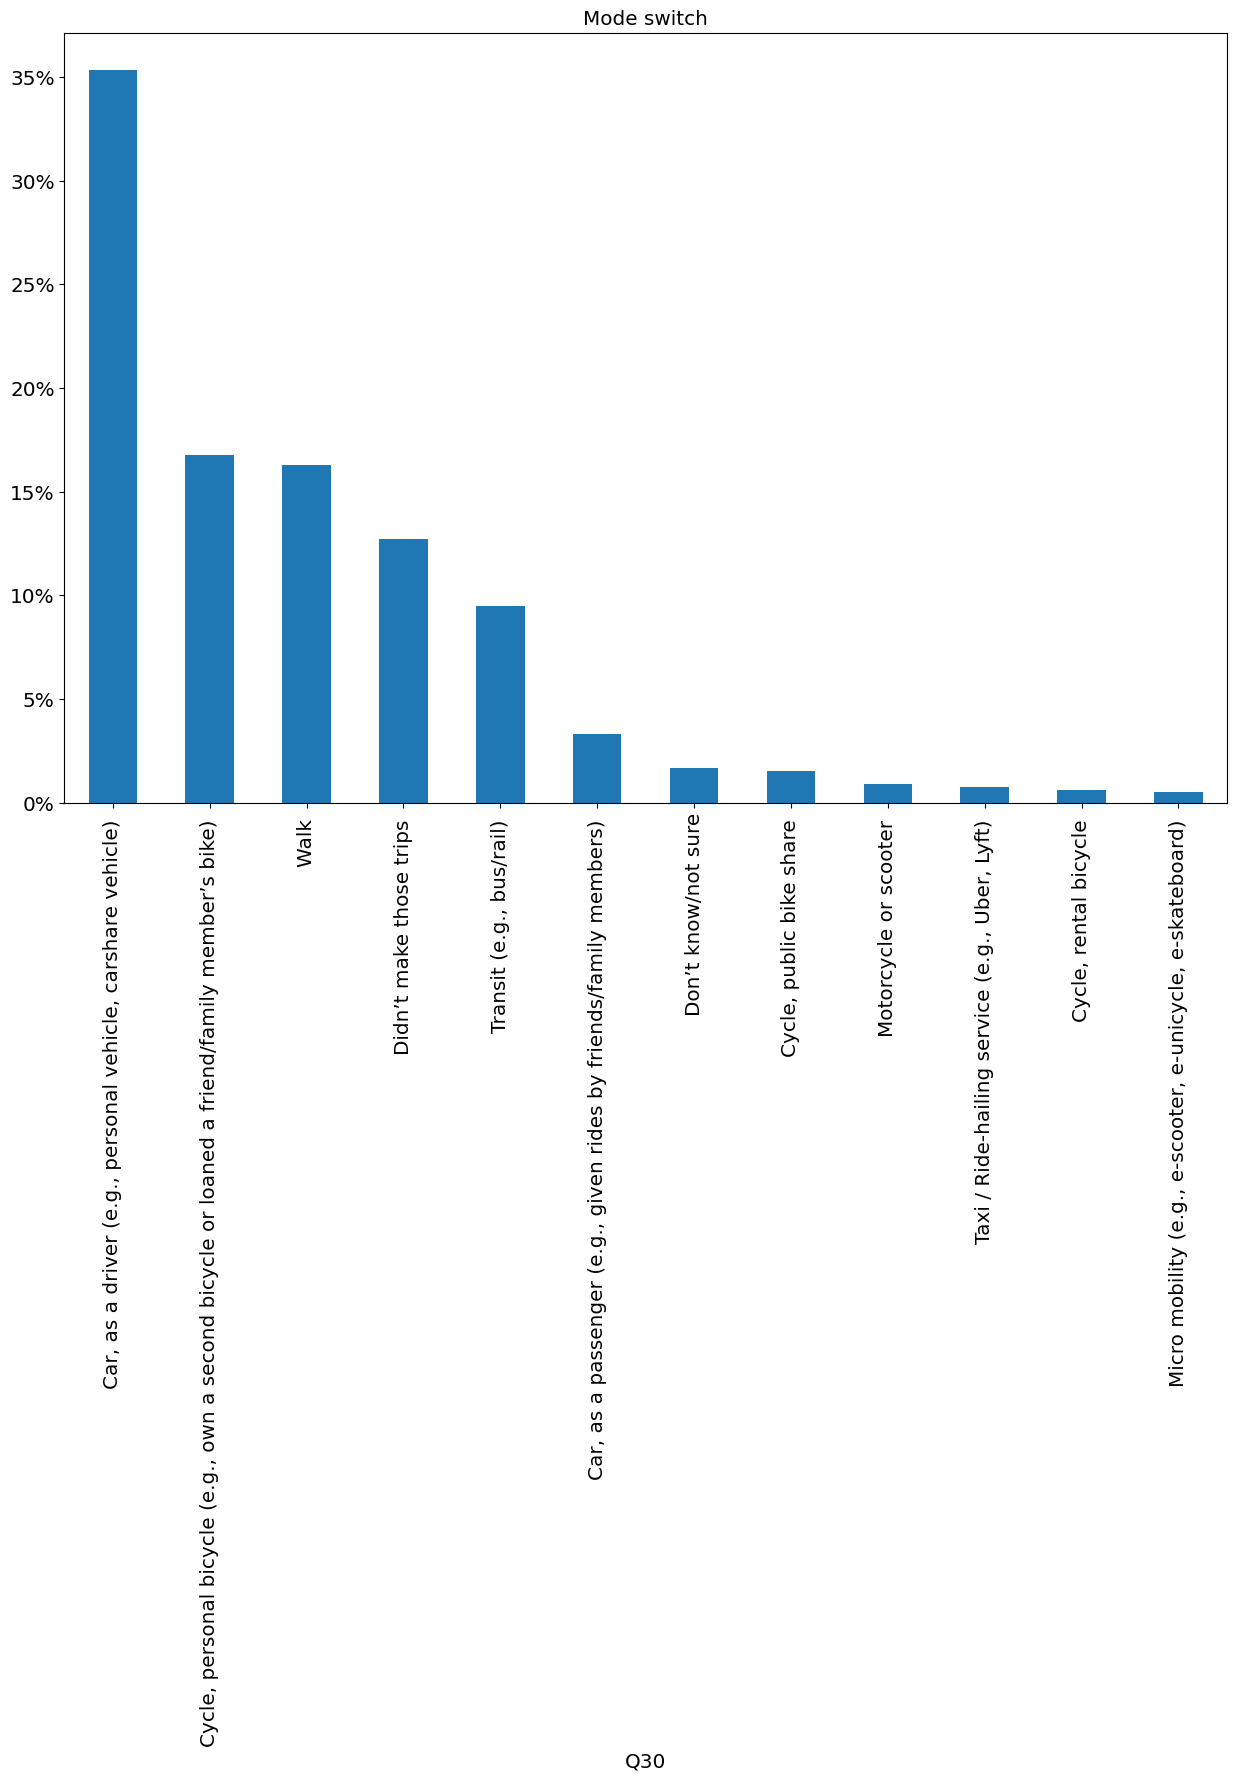

Q31
About the same / no change    859
Less often                    514
I stopped cycling             268
More often                    106
Name: index, dtype: int64


<AxesSubplot: title={'center': 'Theft circumstances'}, xlabel='Q31'>

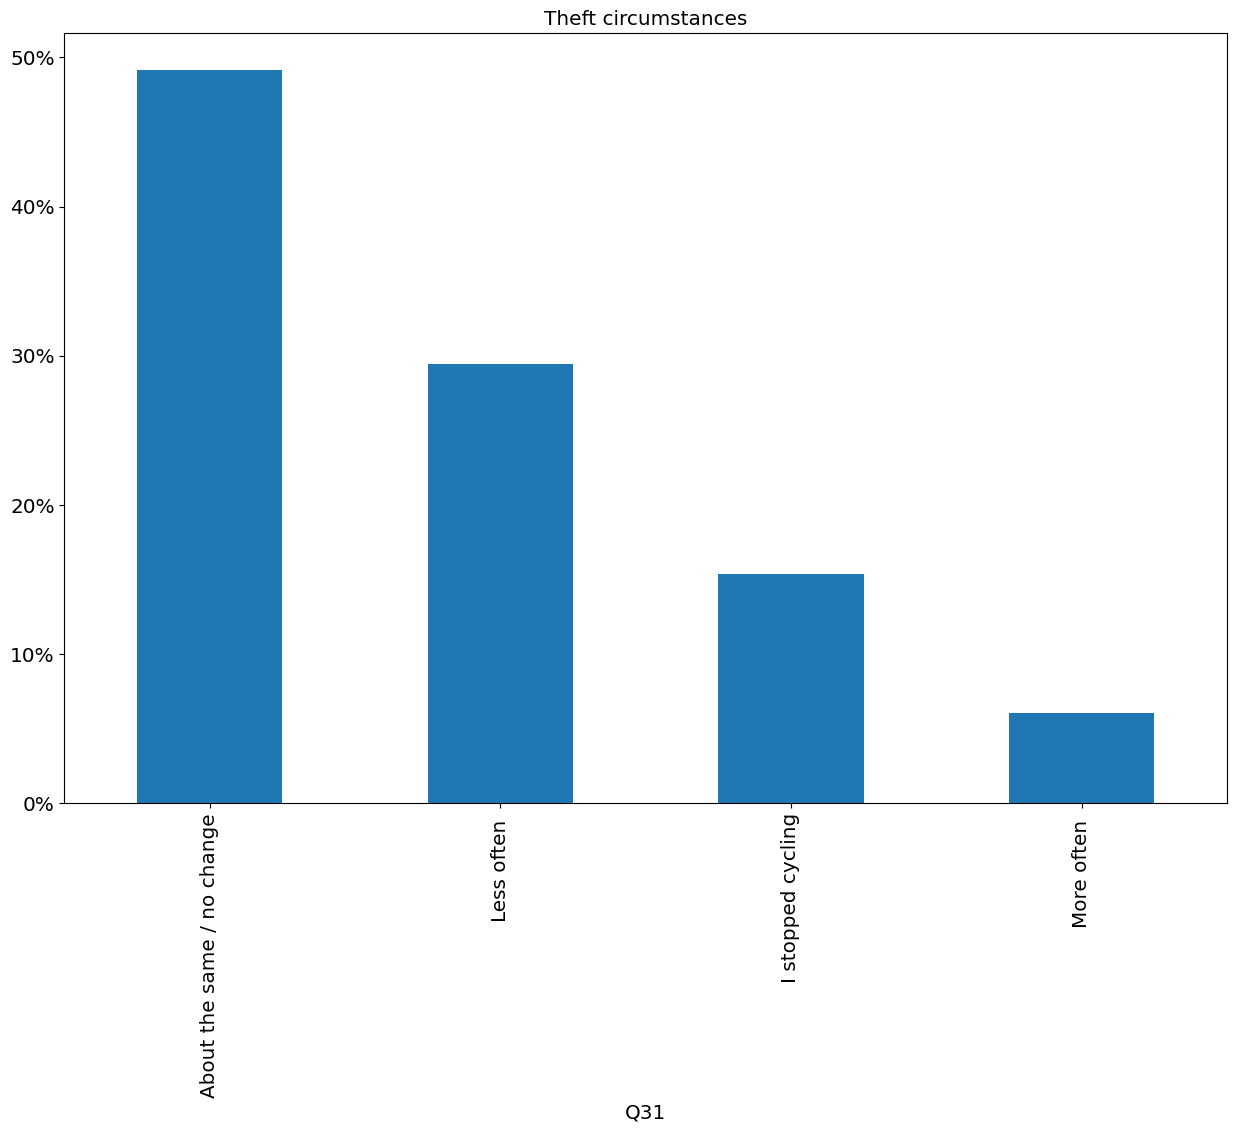

In [14]:

for question in rel_questions_dic.items():
    question_num = question[0]
    if question_num in special_questions:
        continue
    gb_data= data_general.groupby(question_num).count()[field_to_work_on].sort_values(ascending=False)
    print(gb_data)
    sumy = gb_data.sum().sum()
    gb_data['per'] = gb_data/sumy
    gb_data['per'].plot(kind='bar',title=question[1])
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))
    plt.show()